In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
data = pd.read_csv("../data/train.csv", sep = ",")
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
144,Jul-17,293.04,372.00,290.78,361.96
145,Aug-17,363.00,368.52,337.37,351.15
146,Sep-17,351.00,383.25,345.50,350.00
147,Oct-17,354.60,375.75,299.00,314.35


In [3]:
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [4]:
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
data[["Month", "Year"]] = data["Date"].str.split("-", expand=True)
data

,Date,Open,High,Low,Close,Month,Year
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05
...,...,...,...,...,...,...,...
144,Jul-17,293.04,372.00,290.78,361.96,Jul,17
145,Aug-17,363.00,368.52,337.37,351.15,Aug,17
146,Sep-17,351.00,383.25,345.50,350.00,Sep,17
147,Oct-17,354.60,375.75,299.00,314.35,Oct,17


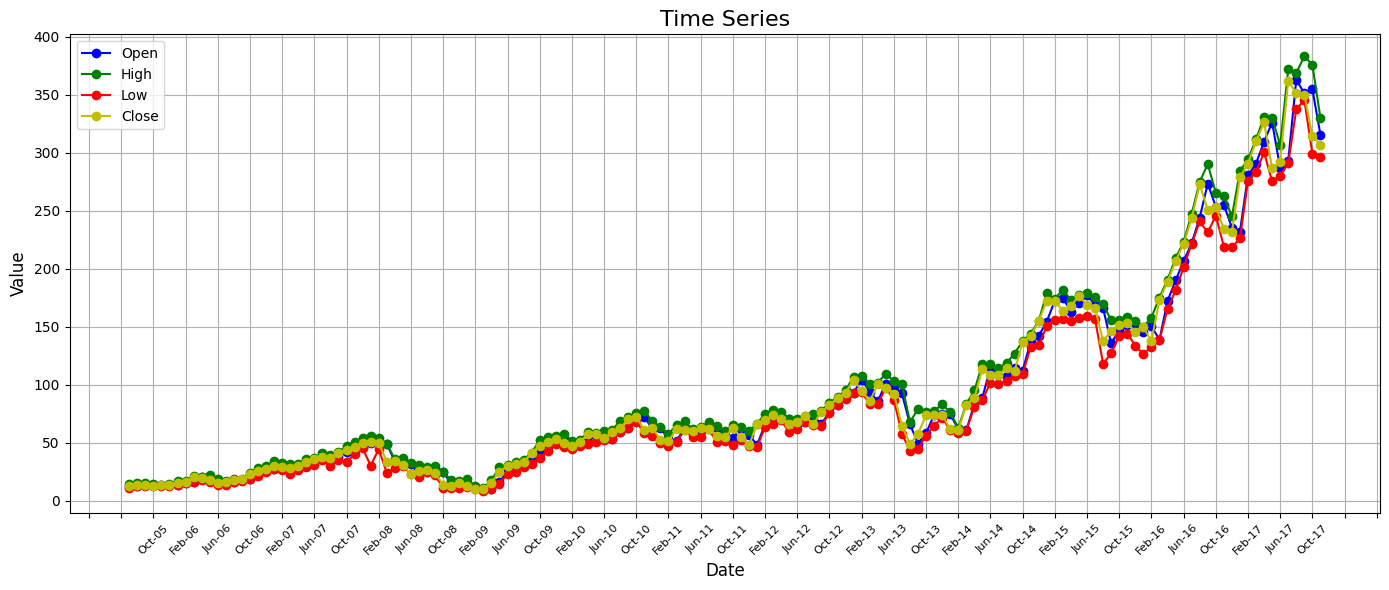

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(data["Date"], data["Open"], marker="o", linestyle="-", color="b", label="Open")
plt.plot(data["Date"], data["High"], marker="o", linestyle="-", color="g", label="High")
plt.plot(data["Date"], data["Low"], marker="o", linestyle="-", color="r", label="Low")
plt.plot(data["Date"], data["Close"], marker="o", linestyle="-", color="y", label="Close")
plt.title("Time Series", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
data['Close_t-1'] = data['Close'].shift(1)
data = data.drop(0)
data.reset_index(inplace = True)
data

,index,Date,Open,High,Low,Close,Month,Year,Close_t-1
0,1,Aug-05,12.58,14.88,12.55,13.42,Aug,05,12.46
1,2,Sep-05,13.48,14.87,12.27,13.30,Sep,05,13.42
2,3,Oct-05,13.20,14.47,12.40,12.99,Oct,05,13.30
3,4,Nov-05,13.35,13.88,12.88,13.41,Nov,05,12.99
4,5,Dec-05,13.49,14.44,13.00,13.71,Dec,05,13.41
...,...,...,...,...,...,...,...,...,...
143,144,Jul-17,293.04,372.00,290.78,361.96,Jul,17,292.37
144,145,Aug-17,363.00,368.52,337.37,351.15,Aug,17,361.96
145,146,Sep-17,351.00,383.25,345.50,350.00,Sep,17,351.15
146,147,Oct-17,354.60,375.75,299.00,314.35,Oct,17,350.00


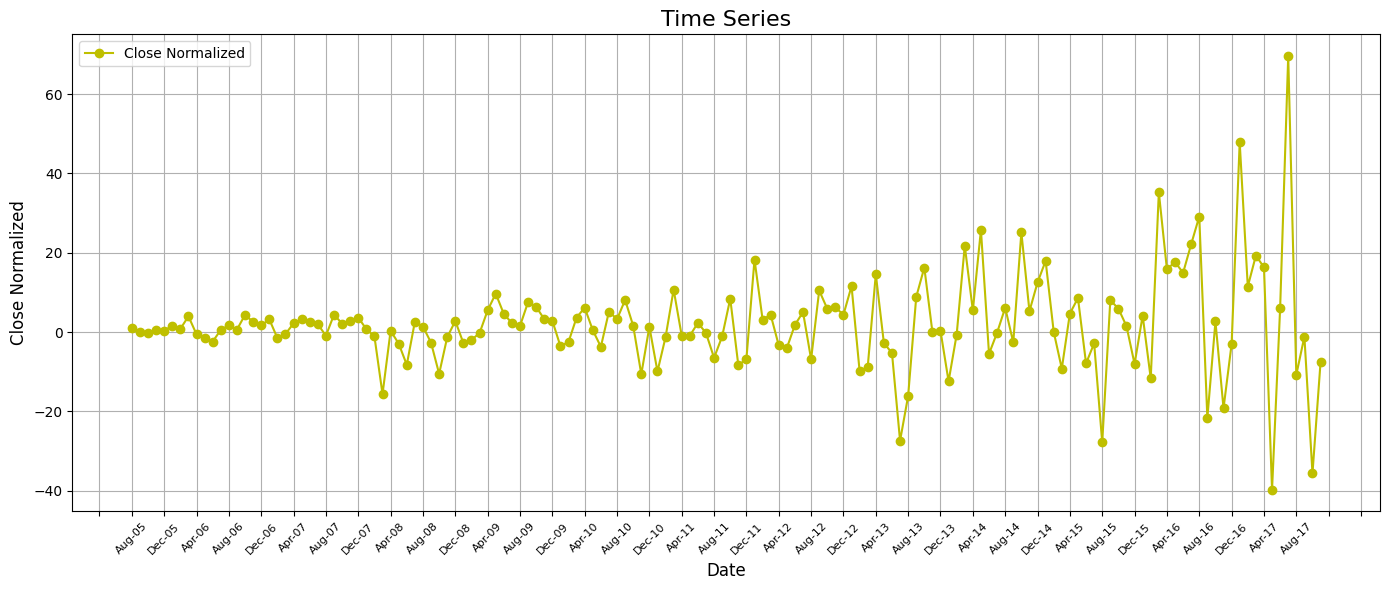

In [8]:
data["Close_normalized"] = data["Close"]-data['Close_t-1']
plt.figure(figsize=(14, 6))
plt.plot(data["Date"], data["Close_normalized"], marker="o", linestyle="-", color="y", label="Close Normalized")
plt.title("Time Series", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Normalized", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

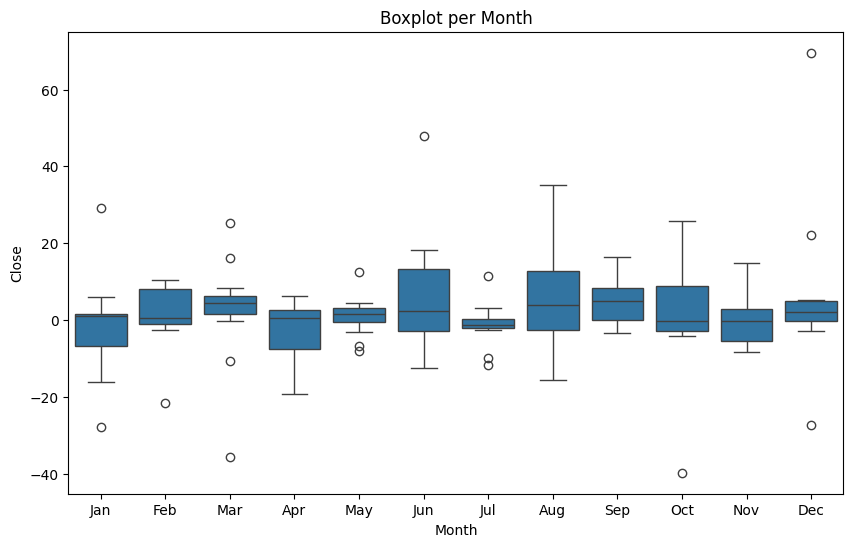

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Close_normalized', data=data)
plt.title('Boxplot per Month')
plt.xlabel('Month')
plt.ylabel('Close')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


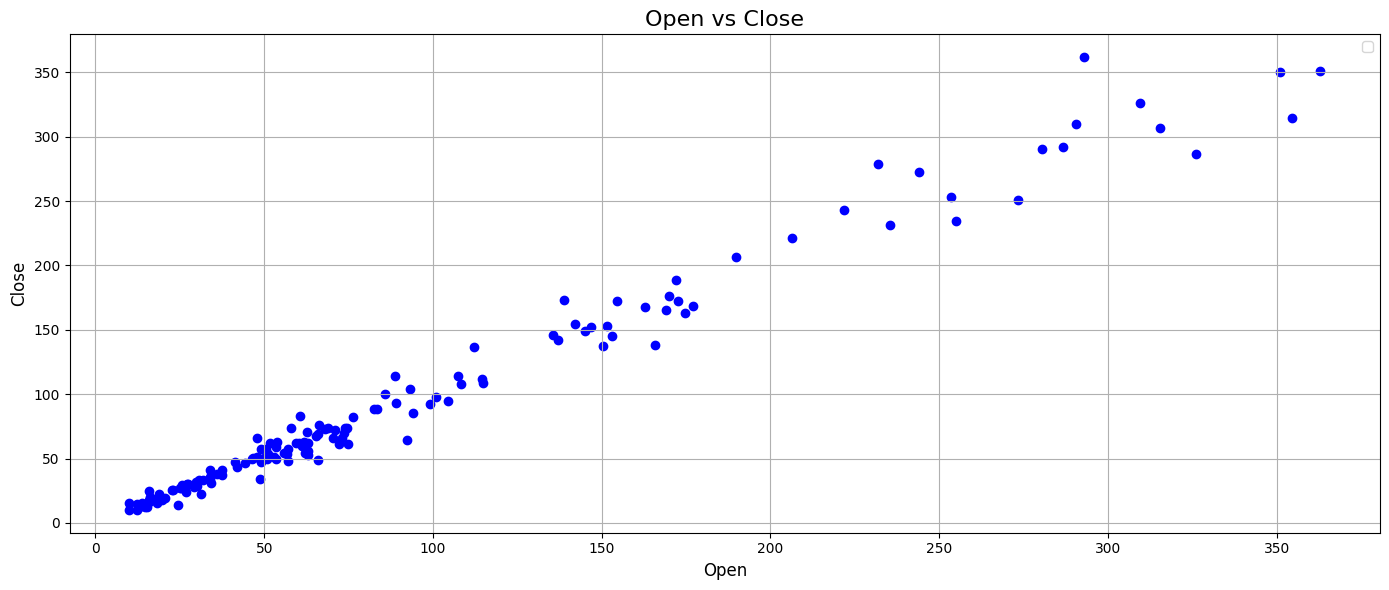

In [10]:
plt.figure(figsize=(14, 6))
plt.scatter(data["Open"], data["Close"], marker="o", linestyle="-", color="b")
plt.title("Open vs Close", fontsize=16)
plt.xlabel("Open", fontsize=12)
plt.ylabel("Close", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


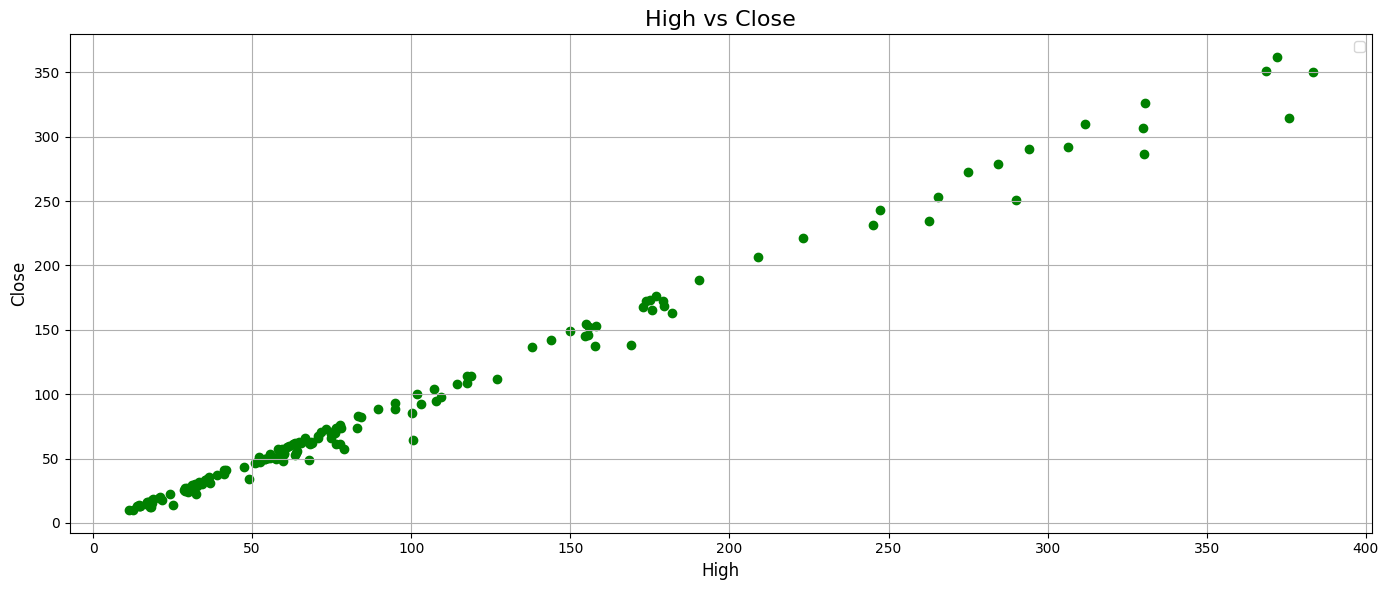

In [11]:
plt.figure(figsize=(14, 6))
plt.scatter(data["High"], data["Close"], marker="o", linestyle="-", color="g")
plt.title("High vs Close", fontsize=16)
plt.xlabel("High", fontsize=12)
plt.ylabel("Close", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


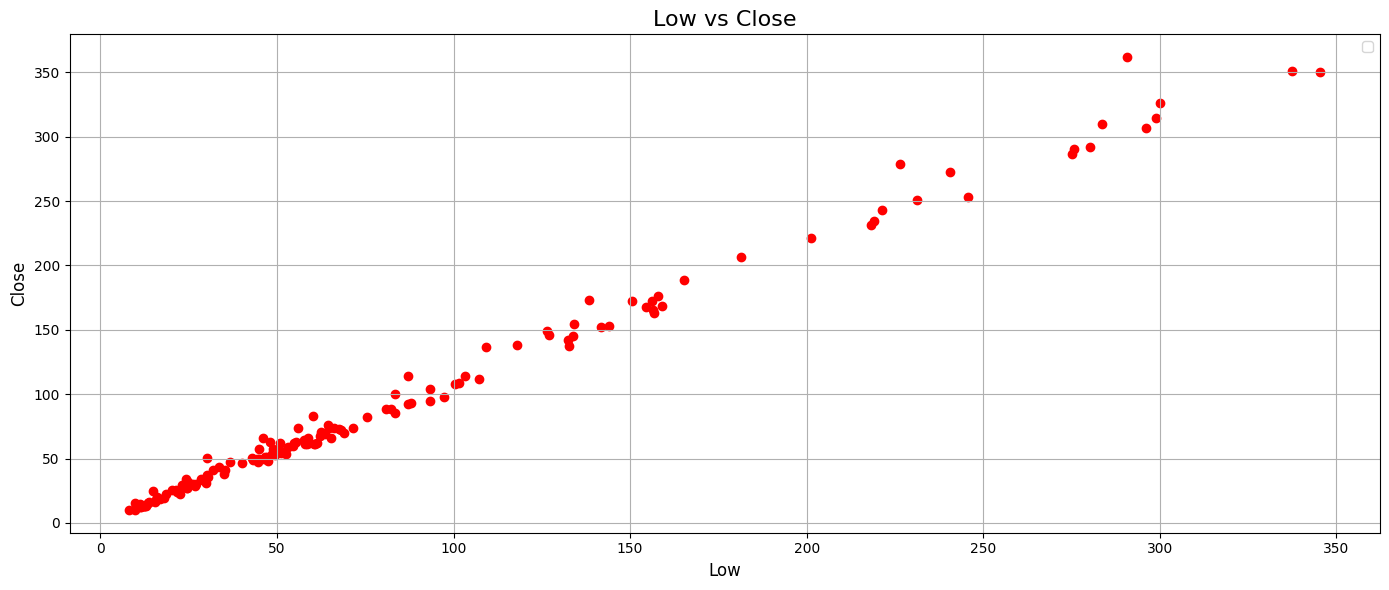

In [12]:
plt.figure(figsize=(14, 6))
plt.scatter(data["Low"], data["Close"], marker="o", linestyle="-", color="r")
plt.title("Low vs Close", fontsize=16)
plt.xlabel("Low", fontsize=12)
plt.ylabel("Close", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
data["log_Open"] = np.log(data["Open"])
data["log_High"] = np.log(data["High"])
data["log_Low"] = np.log(data["Low"])
data["log_Close"] = np.log(data["Close"])
# data = data.drop(columns = ["Date","Month","Year","Close_normalized"])
data

,index,Date,Open,High,Low,Close,Month,Year,Close_t-1,Close_normalized,log_Open,log_High,log_Low,log_Close
0,1,Aug-05,12.58,14.88,12.55,13.42,Aug,05,12.46,0.96,2.532108,2.700018,2.529721,2.596746
1,2,Sep-05,13.48,14.87,12.27,13.30,Sep,05,13.42,-0.12,2.601207,2.699346,2.507157,2.587764
2,3,Oct-05,13.20,14.47,12.40,12.99,Oct,05,13.30,-0.31,2.580217,2.672078,2.517696,2.564180
3,4,Nov-05,13.35,13.88,12.88,13.41,Nov,05,12.99,0.42,2.591516,2.630449,2.555676,2.596001
4,5,Dec-05,13.49,14.44,13.00,13.71,Dec,05,13.41,0.30,2.601949,2.670002,2.564949,2.618125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,144,Jul-17,293.04,372.00,290.78,361.96,Jul,17,292.37,69.59,5.680309,5.918894,5.672567,5.891534
144,145,Aug-17,363.00,368.52,337.37,351.15,Aug,17,361.96,-10.81,5.894403,5.909495,5.821180,5.861213
145,146,Sep-17,351.00,383.25,345.50,350.00,Sep,17,351.15,-1.15,5.860786,5.948688,5.844993,5.857933
146,147,Oct-17,354.60,375.75,299.00,314.35,Oct,17,350.00,-35.65,5.870990,5.928924,5.700444,5.750507


Text(0.5, 1.0, 'log(Open)')

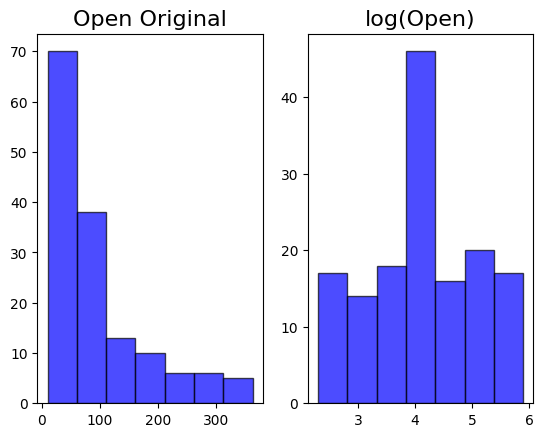

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["Open"], bins=7, color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title("Open Original", fontsize=16)
axes[1].hist(data["log_Open"], bins=7, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("log(Open)", fontsize=16)

Text(0.5, 1.0, 'log(High)')

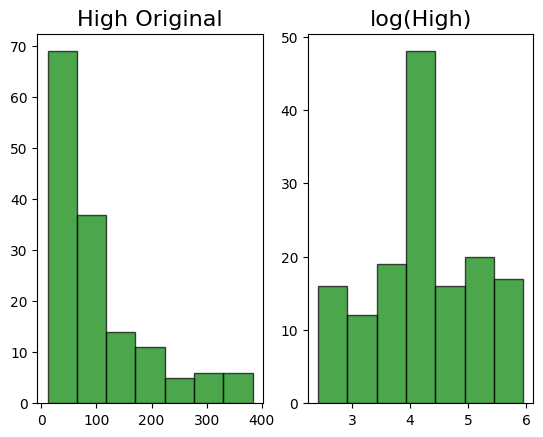

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["High"], bins=7, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title("High Original", fontsize=16)
axes[1].hist(data["log_High"], bins=7, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title("log(High)", fontsize=16)

Text(0.5, 1.0, 'log(Low)')

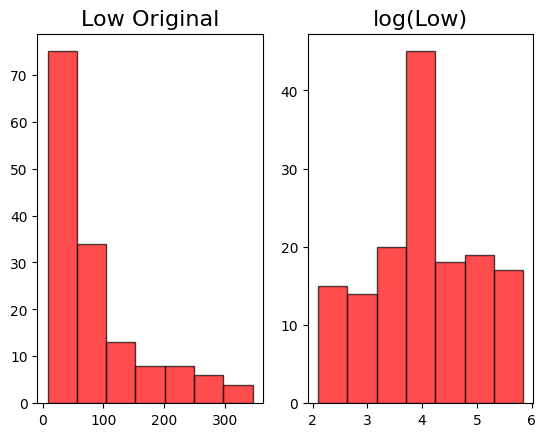

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["Low"], bins=7, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title("Low Original", fontsize=16)
axes[1].hist(data["log_Low"], bins=7, color='red', edgecolor='black', alpha=0.7)
axes[1].set_title("log(Low)", fontsize=16)